# Lab 2 Pichu or Pikachu

## Load and clean the Pichu/Pikachu datas

In [156]:
path1 = "pichu.txt"
path2 = "pikachu.txt"


with open (path1, "r") as p1, open (path2, "r") as p2:

    pichu = [pichu.strip("\n" "()").split(",") for pichu in p1.readlines()]
    pichu.pop(0)

    pikachu = [pikachu.strip("\n" "()").split(",") for pikachu in p2.readlines()]
    pikachu.pop(0)

# Clean the datas, remove all the non-digital noises and make a list of x,y

    
    pichu_width = [float(each_pichu[0]) for each_pichu in pichu]
    pichu_height = [float(each_pichu[1]) for each_pichu in pichu]

    pichu = [[float(each_pichu[0]), float(each_pichu[1]), "Pichu"] for each_pichu in pichu]


    pikachu_width = [float(each_pikachu[0]) for each_pikachu in pikachu]
    pikachu_height = [float(each_pikachu[1]) for each_pikachu in pikachu]

    pikachu = [[float(each_pikachu[0]), float(each_pikachu[1]), "Pikachu"] for each_pikachu in pikachu]

# Remark and separate the width/height from Pichu and Pikachu (for scatter-plot); 
# change datas from string to float
# Add a string of pokemon type in list[2] for further use

    pokemon = pichu + pikachu
    
# print(pichu)
# print(pikachu)
# print(pichu_width)
# print(pichu_height)
# print(pikachu_width)
# print(pikachu_height)
# print(pokemon)

print(len(pichu))
print(len(pikachu))
print(len(pokemon))

50
50
100


## Load and clean the test data

In [157]:
path3 = "test_points.txt"

with open (path3, "r") as t:

    test_points = [test for test in t.readline().split("),")]
    test_points = [test2.strip("( )") for test2 in test_points]
    test_points = [test3.split(",") for test3 in test_points]

# split first with readline(), then remove all the "()", finally split again with ","

    test_width = [float(test[0]) for test in test_points]
    test_height = [float(test[1]) for test in test_points]
    test_points = [[float(test[0]), float(test[1])] for test in test_points]

print(test_points)
# print(test_width)
# print(test_height)

[[25.0, 35.0], [15.0, 14.0], [26.0, 30.0], [22.0, 45.0]]


## Scatter plot:

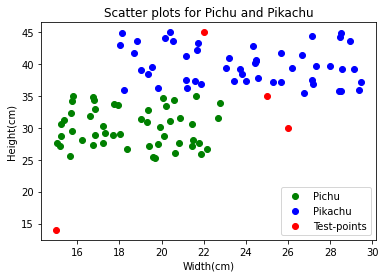

In [158]:
import matplotlib.pyplot as plt

pichu_plot = plt.scatter(pichu_width, pichu_height, color="green")
# axel X : Pichu_width ; axel Y : Pichu_height

pikachu_plot = plt.scatter(pikachu_width, pikachu_height, color="blue")
# axel X : Pikachu_width ; axel Y : Pikachu_height

test_plot = plt.scatter(test_width, test_height, color="red")

plt.xlabel("Width(cm)")
plt.ylabel("Height(cm)")
plt.title("Scatter plots for Pichu and Pikachu")
plt.legend(handles = (pichu_plot, pikachu_plot, test_plot), labels  = ('Pichu', 'Pikachu', "Test-points"))
plt.show()

## Define a distance function

In [159]:
def distance(x1, y1, x2, y2, pokemontype):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5, pokemontype

# Added a fifth element in def to show the "Pokemontype" followed by a distance value 

## Calculate, compare the distances between test and pokemons (1st-closest-point-test)

In [172]:
def test_function(test_point, pokemon): 

# Create a function for testing

        distance_list = []

# Create a empty list for distances

        for each_point in pokemon:

            distance_test = distance(test_point[0], test_point[1], each_point[0], each_point[1], each_point[2])

# calculate the distances with loop for each point in Pokemon, and pokemontype followed

            distance_list.append(distance_test)

# Append to the list

            distance_list.sort() 

# Sort from minst distance to largest

        if distance_list [0][1] == "Pichu":
            print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pichu.")
        else:
            print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pikachu.")
        
        return distance_list [0][1]
        
# Determine the Pokemontype by checking with list[0][1], which "Pichu" or "Pikachu" included. Return the type(str).

result = [test_function(each_test_point, pokemon) for each_test_point in test_points]

# Loop and calculate for each test point and return the results


Sample with (width, height): (25.0, 35.0) classified as Pikachu.
Sample with (width, height): (15.0, 14.0) classified as Pichu.
Sample with (width, height): (26.0, 30.0) classified as Pichu.
Sample with (width, height): (22.0, 45.0) classified as Pikachu.


## Users input with error handling:

In [161]:
while True:

    width = input("Entre a width value of your pokemon")
    height = input("Entre a height value of your pokemon")

    try: 

        if width.isalpha() or height.isalpha():
            raise ValueError("Values must be numerical, please") 

# Error hint for non-numerical inputs

        width = float(width)
        height = float(height)

        if width <= 0 or width >= 40:
            raise ValueError("Width values must between 0 and 40, please")
        
        if height <= 0 or height >= 60:
            raise ValueError("Height values must between 0 and 60, please")

# Error hint for Out-of-range inputs (because the observation points are between 0-30 and 0-50, a large value may not belongs to any of the pokemons)
        
        user_points = [width, height]
        test_function(user_points, pokemon)

# insert the function

        break
        
    except ValueError as err:
        print(err)

Width values must between 0 and 40, please
Height values must between 0 and 60, please
Values must be numerical, please
Sample with (width, height): (23.0, 23.0) classified as Pichu.


## Create and execute a function for "five-closest-points" method

In [180]:
def five_closest_points_function(test_point, pokemon):

    distance_list = []
    
    for each_point in pokemon:

        distance_test = distance(test_point[0], test_point[1], each_point[0], each_point[1], each_point[2])

        distance_list.append(distance_test)

        distance_list.sort() 

    five_points_list = [distance_list[0], distance_list[1], distance_list[2], distance_list[3], distance_list[4]]
    five_points_list = str(five_points_list)

# List the first five-closest-points and change the list to strings

    pichu_count = five_points_list.count('Pichu')
    pikachu_count = five_points_list.count('Pikachu')

# Count the number of Pichus and Pikachus
    
    if pichu_count > pikachu_count:
         
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pichu.")
        return "Pichu"

    else:
        print(f"Sample with (width, height): ({test_point[0]}, {test_point[1]}) classified as Pikachu.")
        return "Pikachu"
        
# The function returns the Pokemontype in strings -> ("Pichu"/"Pikachu")

result = [five_closest_points_function(each_test_point, pokemon) for each_test_point in test_points]

# for loop and calculte with 4 test points

Sample with (width, height): (25.0, 35.0) classified as Pikachu.
Sample with (width, height): (15.0, 14.0) classified as Pichu.
Sample with (width, height): (26.0, 30.0) classified as Pichu.
Sample with (width, height): (22.0, 45.0) classified as Pikachu.


___

# Bonusuppgifter

## Data separate for training and test datas.

In [183]:
import random as rnd

random_pichu = rnd.sample(pichu, 45)        # 45 random data from Pichu
random_pikachu = rnd.sample(pikachu, 45)    # 45 random data from Pikachu

training_data = random_pichu + random_pikachu  

test_pichu= [each_pichu for each_pichu in pichu if each_pichu not in random_pichu]  # The rest of Pichu(5st)
test_pikachu =  [each_pikachu for each_pikachu in pikachu if each_pikachu not in random_pikachu] # The rest of Pikachu(5st)

test_data = test_pichu + test_pikachu

print(len(training_data))
print(len(test_data))


90
10


## Calculte accuracy with 1st-closest point

In [186]:
TN_TP = 0

for each_test_data in test_data:
    
    if test_function(each_test_data, training_data) == each_test_data[2]: 

        TN_TP+=1
    
# Similar codes with test_function but adjust "Pichu" to "each_test_data[2]" 
# which means that, if the closest point's Pokemontype (or predictor) equal to the each_test_data's real Pokemontype, TN/TP will be added.

print(TN_TP)
print(f"Accuracy(1st_point_method) = {TN_TP/len(test_data)*100} %")

Sample with (width, height): (20.11541438766307, 28.701809671168824) classified as Pichu.
Sample with (width, height): (22.137436541638763, 26.71138648198097) classified as Pichu.
Sample with (width, height): (17.692756360901015, 28.95631901060664) classified as Pichu.
Sample with (width, height): (16.862327090888243, 28.816192865065368) classified as Pichu.
Sample with (width, height): (15.808011435277834, 34.96121380240097) classified as Pichu.
Sample with (width, height): (29.445791130252964, 37.20217384451559) classified as Pikachu.
Sample with (width, height): (28.951534072137846, 43.59635400253747) classified as Pikachu.
Sample with (width, height): (27.3435177435667, 39.726710263117944) classified as Pikachu.
Sample with (width, height): (27.97998635233415, 39.67024668036675) classified as Pikachu.
Sample with (width, height): (23.703388537184775, 39.21881639834404) classified as Pikachu.
10
Accuracy(1st_point_method) = 100.0 %


## Calculte accuracy with 5st-closest point

In [185]:
TN_TP = 0

for each_test_data in test_data:
    
    if five_closest_points_function(each_test_data, training_data) == each_test_data[2]:

        TN_TP+=1

print(TN_TP)
print(f"Accuracy(5st_closest_point_method) = {TN_TP/len(test_data)*100} %")

Sample with (width, height): (20.11541438766307, 28.701809671168824) classified as Pichu.
Sample with (width, height): (22.137436541638763, 26.71138648198097) classified as Pichu.
Sample with (width, height): (17.692756360901015, 28.95631901060664) classified as Pichu.
Sample with (width, height): (16.862327090888243, 28.816192865065368) classified as Pichu.
Sample with (width, height): (15.808011435277834, 34.96121380240097) classified as Pichu.
Sample with (width, height): (29.445791130252964, 37.20217384451559) classified as Pikachu.
Sample with (width, height): (28.951534072137846, 43.59635400253747) classified as Pikachu.
Sample with (width, height): (27.3435177435667, 39.726710263117944) classified as Pikachu.
Sample with (width, height): (27.97998635233415, 39.67024668036675) classified as Pikachu.
Sample with (width, height): (23.703388537184775, 39.21881639834404) classified as Pikachu.
10
Accuracy(5st_closest_point_method) = 100.0 %


## A statable accuracy can due to two reasons:

- The size of observations is too small.
- There are significant differences between the two datasets(Pichu/Pikachu).